In [32]:
pip install wordcloud

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv("/content/bbc-text (1).csv")

In [35]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Understanding Features and Target Variables

In [36]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [37]:
data.shape

(2225, 2)

In [38]:
data.dtypes

,0
category,object
text,object


# Checking for NULL values

In [39]:
data.isnull().any()

,0
category,False
text,False


# Countplot of Target Variable(Category)

<Axes: xlabel='count', ylabel='category'>

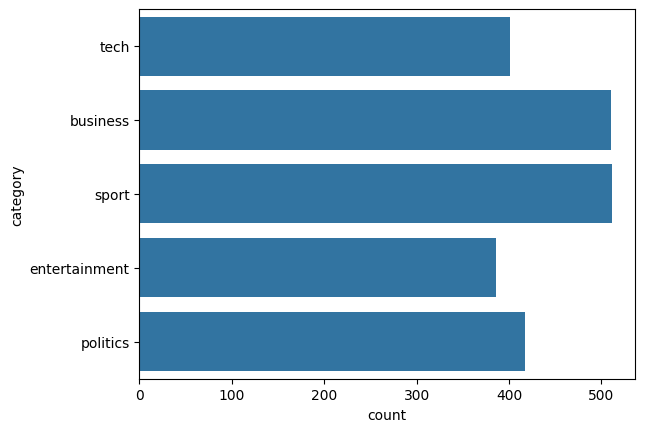

In [40]:
sns.countplot(data['category'])

In [41]:
data['News_length'] = data['text'].str.len()
print(data['News_length'])

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: News_length, Length: 2225, dtype: int64


# Distribution Plot

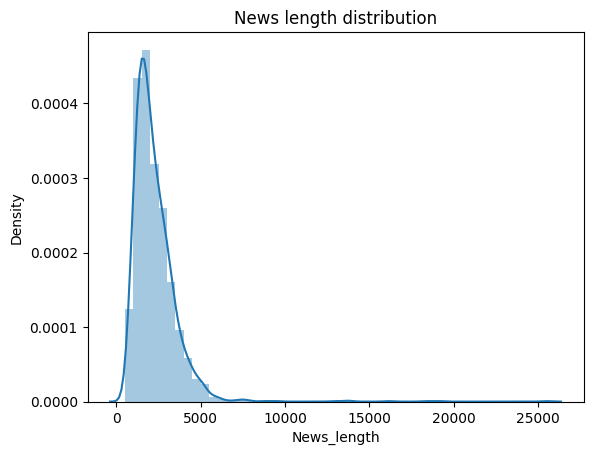

In [42]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [43]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

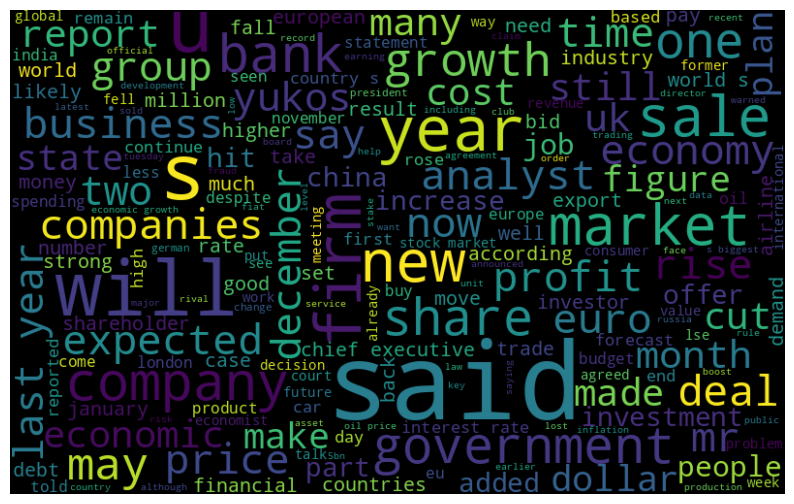

In [44]:
subset=data[data['category']=="business"]
text=subset['text'].values
words =" ".join(text)
create_wordcloud(words)

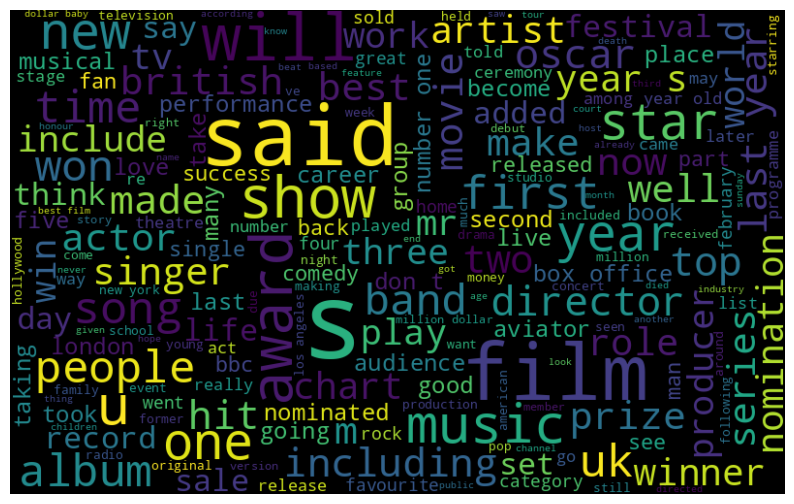

In [45]:
subset=data[data['category']=="entertainment"]
text=subset['text'].values
words =" ".join(text)
create_wordcloud(words)

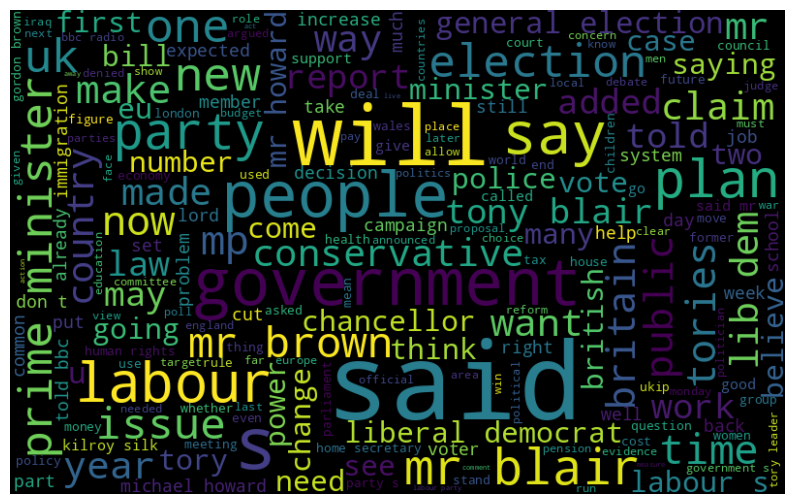

In [46]:
subset=data[data['category']=="politics"]
text=subset['text'].values
words =" ".join(text)
create_wordcloud(words)

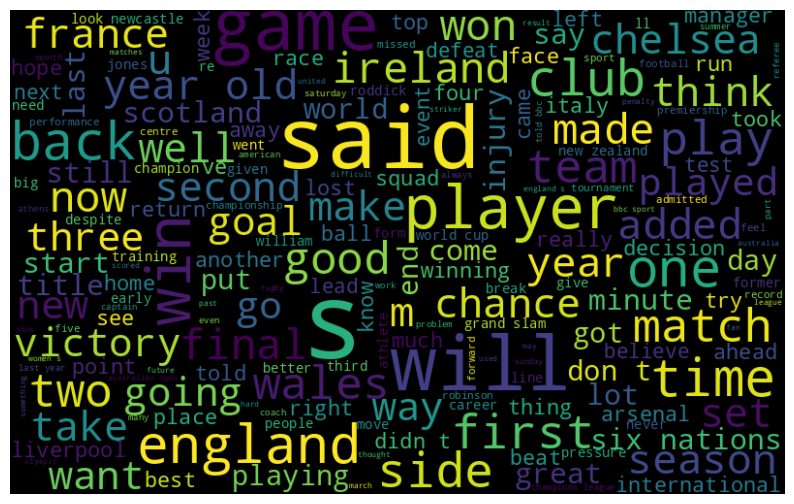

In [47]:
subset=data[data['category']=="sport"]
text=subset['text'].values
words =" ".join(text)
create_wordcloud(words)

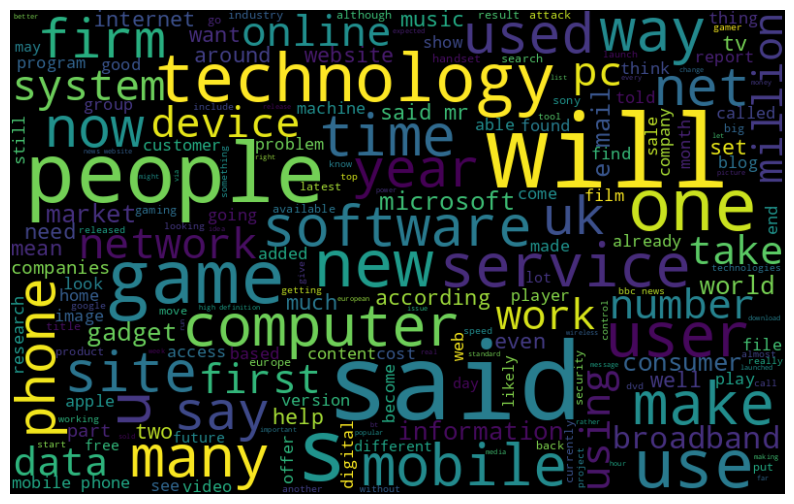

In [48]:
subset=data[data['category']=="tech"]
text=subset['text'].values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)


    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text

In [52]:
data['Text'] = data['text'].apply(process_text)

In [53]:
data.head()

,category,text,News_length,Text
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


# Label Encoding

In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Category_target']= label_encoder.fit_transform(data['category'])

In [55]:
data.head()

,category,text,News_length,Text,Category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [56]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'],
                                                    data['Category_target'],
                                                    test_size=0.2,
                                                    random_state=8)

In [58]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [59]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0.         0.19720545 0.         ... 0.         0.         0.        ]
 [0.         0.         0.29840098 ... 0.09158716 0.         0.12056833]
 [0.20292467 0.10688436 0.         ... 0.         0.06912208 0.19786525]
 ...
 [0.         0.12128619 0.         ... 0.         0.20467317 0.        ]
 [0.12884067 0.         0.         ... 0.         0.         0.        ]
 [0.11815315 0.         0.         ... 0.07696434 0.         0.        ]]
(445, 300)


# Building Models

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9438202247191011
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.94      0.93      0.93        85
           2       0.93      0.91      0.92        77
           3       0.97      0.95      0.96       102
           4       0.97      0.97      0.97        76

    accuracy                           0.94       445
   macro avg       0.95      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [61]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [62]:
# from sklearn.model_selection import GridSearchCV
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
#               min_samples_split = min_samples_split,
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1,
#                       n_jobs = -1)
# bestF = gridF.fit(features_train, labels_train)

In [63]:
# bestF.best_params_

NameError: name 'bestF' is not defined

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
# model1.fit(features_train, labels_train)
# model_predictions = model1.predict(features_test)
# print('Accuracy: ', accuracy_score(labels_test, model_predictions))
# print(classification_report(labels_test, model_predictions))

# Logistic Regression

In [64]:
model2= LogisticRegression()
print(model2.get_params())
target_names = label_encoder.classes_

model2.fit(features_train, labels_train)
model2_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model2_predictions))
print(classification_report(labels_test, model2_predictions, target_names=target_names))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9438202247191011
               precision    recall  f1-score   support

     business       0.91      0.95      0.93       105
entertainment       0.94      0.93      0.93        85
     politics       0.93      0.91      0.92        77
        sport       0.97      0.95      0.96       102
         tech       0.97      0.97      0.97        76

     accuracy                           0.94       445
    macro avg       0.95      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



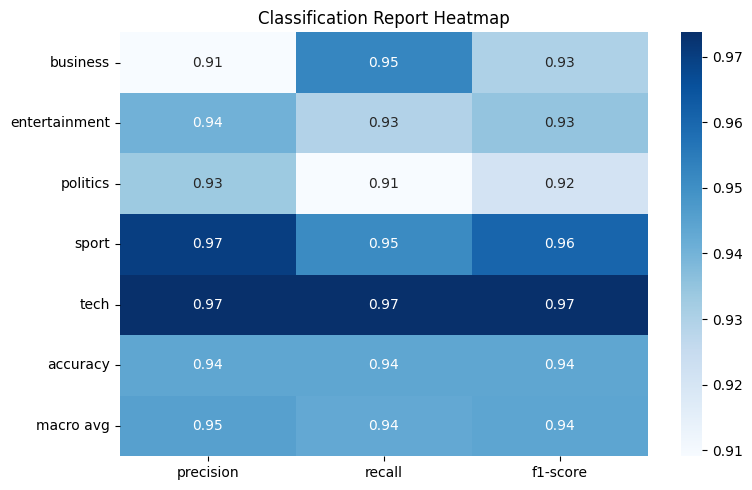

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


report = classification_report(labels_test, model2_predictions, target_names=target_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.tight_layout()
plt.savefig("classification_report.png")


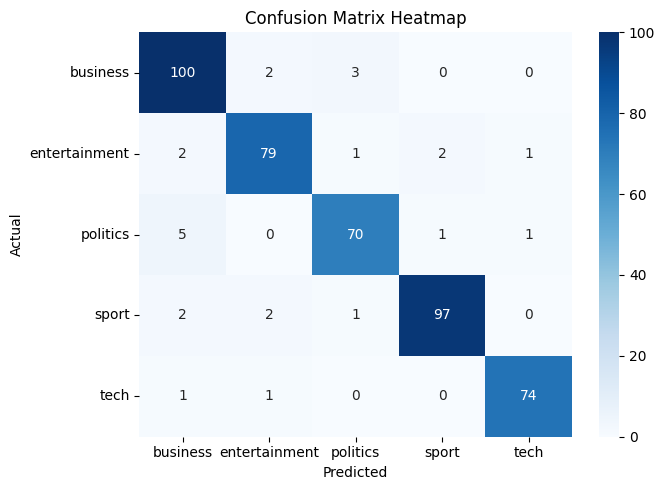

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels_test, model2_predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


In [68]:
import pickle

In [69]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf , f)


with open("model2.pkl", "wb") as f:
    pickle.dump(model, f)